[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab1-NetworkSci-PSN/notebooks/00-introduksjon.ipynb)


Versjon 29.11.2025, A. Lundervold


# Introduksjon til grafteori, nettverksvitenskap og pasient-likhetsnettverk

Velkommen til Lab 1! I denne notebooken får du en praktisk introduksjon til **grafteori**, **nettverksvitenskap** (Network Science) og konseptet **pasient-likhetsnettverk** (Patient Similarity Networks, PSN).

**Hva skal vi lære?**

- Hva en graf er og hvorfor det er relevant i medisin
- Grunnleggende grafegenskaper og terminologi
- Hvordan nettverksvitenskap kan brukes i klinisk sammenheng
- Konseptet pasient-likhetsnettverk og dets anvendelser

Vi bruker Python-biblioteket `networkx` for å lage og analysere grafer.

---

> 💡 **Tips:** Eksperimenter gjerne med koden! Endre parametere og se hva som skjer.

> 🔧 **Råd:** Praktisk utforskning gir dypere forståelse. Ikke vær redd for å gjøre feil!


---

## Hvorfor nettverk i medisin?

Som lege vil du daglig møte komplekse sammenhenger: Hvordan henger symptomer sammen med diagnoser? Hvilke pasienter responderer likt på en behandling? Hvordan sprer sykdommer seg i en befolkning?

Tradisjonelt har medisin fokusert på **enkeltvariabler** – én risikofaktor, ett symptom, én behandling. Men kroppen og helsevesenet er **systemer** der alt henger sammen. For å forstå disse sammenhengene trenger vi verktøy som kan håndtere **relasjoner** mellom mange elementer samtidig.

Her kommer **grafteori** og **nettverksvitenskap** inn.

---

## Grafteori – matematikken bak relasjoner

**Grafteori** er en gren av matematikken som studerer **grafer** – strukturer som beskriver hvordan objekter er forbundet med hverandre.

🔑 **Nøkkelidé:** En graf består av:
- **Noder** (punkter) – objektene vi studerer
- **Kanter** (linjer) – forbindelsene mellom dem

| Medisinsk eksempel | Noder | Kanter |
|--------------------|-------|--------|
| Sykdomsnettverk | Sykdommer | Delte risikofaktorer |
| Symptomnettverk | Symptomer | Opptrer sammen |
| Protein-interaksjoner | Proteiner | Fysisk binding |
| Smittespredning | Personer | Smittekontakt |

Grafteori gir oss et **presist språk** for å beskrive og analysere slike sammenhenger matematisk.

---

## Nettverksvitenskap – fra teori til innsikt

**Nettverksvitenskap** (Network Science) anvender grafteori på virkelige systemer for å oppdage mønstre og struktur.

Sentrale spørsmål nettverksvitenskap kan besvare:

| Spørsmål | Nettverksbegrep | Medisinsk anvendelse |
|----------|-----------------|---------------------|
| *Hvem er mest sentral?* | Sentralitet | Hvilke gener er viktigst i en sykdomsprosess? |
| *Finnes det grupper?* | Klynger/samfunn | Finnes det pasientundergrupper med ulik prognose? |
| *Hvor robust er systemet?* | Nettverksrobusthet | Hva skjer hvis et protein slutter å fungere? |
| *Hvordan sprer ting seg?* | Diffusjon | Hvordan sprer infeksjoner seg i en befolkning? |

> 📊 **Fun fact:** Nettverksvitenskap har avslørt at mange biologiske nettverk har lignende struktur som sosiale nettverk og internett – såkalte *scale-free* nettverk.

<details>
<summary>🔬 <b>Hva er et "scale-free" nettverk?</b> (klikk for å utvide)</summary>

### Scale-free nettverk forklart

I et **scale-free** (skala-fritt) nettverk har de fleste nodene få forbindelser, mens noen få noder – kalt **huber** – har svært mange forbindelser.

**Intuitivt eksempel: Flyplasser**
- De fleste flyplasser har få direkteruter
- Men noen få (Oslo, Frankfurt, Dubai) er *huber* med hundrevis av ruter
- Hvis en liten flyplass stenges, merkes det knapt
- Hvis en hub stenges, kollapser store deler av nettverket

**I medisin og biologi:**

| Nettverk | Huber (sentrale noder) | Konsekvens |
|----------|------------------------|------------|
| Protein-interaksjoner | Noen få proteiner binder til hundrevis av andre | Mutasjon i en hub → alvorlig sykdom |
| Genregulering | Master-regulatorer (f.eks. p53) | p53-mutasjon finnes i ~50% av krefttilfeller |
| Sykdomsnettverk | Noen sykdommer deler gener med mange andre | Forklarer komorbiditet |
| Hjernenettverk | Hub-regioner (f.eks. prefrontal cortex) | Skade her gir større funksjonstap |

**Matematisk:** I et scale-free nettverk følger gradsfordelingen en *potenslov*: $P(k) \propto k^{-\gamma}$, der $k$ er antall forbindelser og $\gamma$ typisk er mellom 2 og 3.

**Hvorfor er dette viktig?**
1. **Robusthet:** Scale-free nettverk tåler tilfeldig feil godt (de fleste noder har få forbindelser)
2. **Sårbarhet:** Men de er svært sårbare for målrettede angrep på huber
3. **Legemiddelmål:** Huber er ofte gode drug targets – men også risikable (bivirkninger)

> 💡 **Klinisk innsikt:** Når du ser at et protein er involvert i mange sykdommer, kan det være en hub i det biologiske nettverket – og dermed et potensielt legemiddelmål, men også en kilde til bivirkninger.

</details>

---

## Pasient-likhetsnettverk (PSN)

**Pasient-likhetsnettverk** (Patient Similarity Networks) er en spesifikk anvendelse av nettverksvitenskap i klinisk medisin.

### Idéen er enkel:
1. **Hver pasient er en node**
2. **Lignende pasienter kobles med en kant**
3. **Jo mer like, jo sterkere forbindelse** (vektet kant)

### Hva brukes det til?

| Anvendelse | Beskrivelse |
|------------|-------------|
| **Sykdomsundertyping** | Finne undergrupper av pasienter med ulik sykdomsmekanisme |
| **Prognose** | Predikere utfall basert på lignende pasienter |
| **Behandlingsvalg** | "Pasienter som ligner deg responderte best på behandling X" |
| **Sjeldne sykdommer** | Finne lignende pasienter på tvers av sykehus |

### Eksempel: Kreftbehandling
Tenk deg 1000 kreftpasienter. I stedet for å behandle alle likt, kan vi:
1. Beregne likhet basert på genetikk, biomarkører og kliniske data
2. Bygge et pasient-likhetsnettverk
3. Identifisere klynger av lignende pasienter
4. Se hvilken behandling som fungerte best i hver klynge
5. Gi persontilpassede anbefalinger til nye pasienter

> 🎯 **Presisjonsmedisin:** PSN er et viktig verktøy for å bevege oss fra "one-size-fits-all" til persontilpasset medisin.

---

## 📜 Historisk perspektiv: Fra Königsberg til nettverksmedisin

Grafteori har en fascinerende historie som starter med et hverdagslig problem:

### Eulers broer (1736)
Matematikeren **Leonhard Euler** studerte et tilsynelatende enkelt spørsmål: *Kan man gå over alle de syv broene i Königsberg nøyaktig én gang?* Ved å abstrahere problemet til noder (landområder) og kanter (broer), beviste han at det var umulig – og grunnla dermed grafteori.

> 🌉 **Lærdommen:** Ved å fokusere på *relasjoner* i stedet for detaljer, kunne Euler løse et problem som hadde forvirret folk i generasjoner.

<details>
<summary>🌉 <b>Dypdykk: Königsberg-broene og Eulers bevis</b> (klikk for å utvide)</summary>

### Problemet: Königsbergs syv broer

Byen Königsberg (nå Kaliningrad, Russland) lå ved elven Pregel, som delte byen i fire landområder forbundet av syv broer. Kartet nedenfor viser den historiske situasjonen:

<div style="display: flex; justify-content: center; gap: 20px; flex-wrap: wrap; margin: 20px 0;">
<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/commons/5/5d/Konigsberg_bridges.png" alt="Königsberg broer kart" style="max-width: 350px;">
<p><em>Historisk kart over Königsberg med de syv broene</em></p>
</div>
<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/commons/9/91/7_bridges.svg" alt="Königsberg graf" style="max-width: 250px;">
<p><em>Eulers graf-abstraksjon av problemet</em></p>
</div>
</div>

**De fire landområdene:**
- **A** – Nordbredden (øverst)
- **B** – Kneiphof (den store øya i midten)
- **C** – Lomse (den lille øya/området til høyre)  
- **D** – Sørbredden (nederst)

**Spørsmålet:** Kan man starte et sted, gå over *hver* bro *nøyaktig én gang*, og ende opp et sted (ikke nødvendigvis startpunktet)?

Innbyggerne i Königsberg prøvde i årevis uten hell. Var det umulig, eller hadde de bare ikke funnet ruten?

---

### Eulers abstraksjon: Fra kart til graf

Eulers genistrek var å innse at de fysiske detaljene (broenes lengde, øyenes form, avstandene) var *irrelevante*. Det eneste som betød noe var **topologien** – hvem som er forbundet med hvem:

- **Noder** $V = \{A, B, C, D\}$: De fire landområdene
- **Kanter** $E$: De syv broene

**Multigrafen** (graf med flere kanter mellom samme noder):

| Forbindelse | Antall broer |
|-------------|--------------|
| A — B | 2 |
| A — C | 1 |
| A — D | 1 |
| B — C | 1 |
| B — D | 1 |
| C — D | 1 |

**Totalt:** 7 kanter (broer)

---

### Formell definisjon: Euler-sti og Euler-krets

**Definisjon 1 (Euler-sti):**
En *Euler-sti* i en graf $G = (V, E)$ er en sti som besøker **hver kant nøyaktig én gang**.

**Definisjon 2 (Euler-krets):**
En *Euler-krets* er en Euler-sti som starter og slutter i samme node (en lukket sti).

**Definisjon 3 (Grad):**
*Graden* til en node $v$, notert $\deg(v)$, er antall kanter som er tilknyttet $v$.

---

### Eulers teorem: Nødvendige og tilstrekkelige betingelser

**Teorem (Euler, 1736):**
La $G$ være en sammenhengende graf. Da gjelder:

1. $G$ har en **Euler-krets** $\Longleftrightarrow$ alle noder har **partallsgrad**

2. $G$ har en **Euler-sti** (men ikke krets) $\Longleftrightarrow$ nøyaktig **to noder** har **oddetallsgrad**

---

### Bevis: Hvorfor Königsberg ikke har en Euler-sti

**Steg 1: Beregn graden til hver node**

$$\deg(A) = 2 + 1 + 1 = 3 \quad \text{(broer til B, C, D)}$$
$$\deg(B) = 2 + 1 + 1 = 5 \quad \text{(broer til A, C, D, men 2 til A)}$$

Vent – la oss telle nøyaktig fra tabellen:
- Node A er endepunkt for: 2 (til B) + 1 (til C) + 1 (til D) = **3 kanter**
- Node B er endepunkt for: 2 (til A) + 1 (til C) + 1 (til D) = **5 kanter**

Nei, dette stemmer ikke. La meg telle på nytt fra det historiske problemet:

De syv broene forbinder:
1. A — B (bro 1)
2. A — B (bro 2)  
3. A — C (bro 3)
4. B — C (bro 4)
5. B — D (bro 5)
6. C — D (bro 6)
7. C — D (bro 7)

**Korrekt gradtelling:**

| Node | Tilknyttede broer | Grad |
|------|-------------------|------|
| A | 1, 2, 3 | $\deg(A) = 3$ |
| B | 1, 2, 4, 5 | $\deg(B) = 5$ |
| C | 3, 4, 6, 7 | $\deg(C) = 3$ |
| D | 5, 6, 7 | $\deg(D) = 3$ |

**Verifisering:** $\sum_{v \in V} \deg(v) = 3 + 5 + 3 + 3 = 14 = 2 \cdot |E| = 2 \cdot 7$ ✓

(Summen av alle grader er alltid $2 \times$ antall kanter, siden hver kant bidrar til graden til nøyaktig to noder.)

---

**Steg 2: Tell noder med oddetallsgrad**

| Node | Grad | Paritet |
|------|------|---------|
| A | 3 | Odde |
| B | 5 | Odde |
| C | 3 | Odde |
| D | 3 | Odde |

**Antall noder med oddetallsgrad:** 4

---

**Steg 3: Anvend Eulers teorem**

For at en Euler-sti skal eksistere, trenger vi:
- 0 noder med oddetallsgrad (Euler-krets), eller
- 2 noder med oddetallsgrad (Euler-sti)

**Men Königsberg har 4 noder med oddetallsgrad!**

$$|\{v \in V : \deg(v) \text{ er odde}\}| = 4$$

$$4 \neq 0 \quad \text{og} \quad 4 \neq 2$$

---

**Steg 4: Konklusjon**

$$\boxed{\text{Königsberg-grafen har ingen Euler-sti}}$$

Det er **matematisk umulig** å krysse alle syv broer nøyaktig én gang. $\blacksquare$

---

### Intuisjonen bak beviset

**Hvorfor må oddetallsnoder være ≤ 2?**

Tenk på hva som skjer når du går langs en sti:

1. **Startnode:** Du *forlater* uten å ha ankommet → bruker 1 kant (odde bidrag)
2. **Mellomliggende noder:** Du ankommer og forlater → bruker 2 kanter per besøk (partall bidrag)
3. **Sluttnode:** Du *ankommer* uten å forlate → bruker 1 kant (odde bidrag)

Hvis start ≠ slutt: nøyaktig 2 noder har "ubalansert" kantbruk (odde grad)
Hvis start = slutt: alle noder har "balansert" kantbruk (partall grad)

**I Königsberg** har ALLE fire noder oddetallsgrad. Det betyr at *fire* noder ville trenge å være enten start eller slutt – men en sti kan bare ha én start og én slutt!

---

### Medisinske implikasjoner

Eulers tilnærming – å abstrahere et problem til noder og kanter – har direkte anvendelser i medisin:

#### 1. **Metabolske veier**
Metabolitter (noder) forbundet av enzymatiske reaksjoner (kanter). Spørsmål som "kan vi komme fra substrat A til produkt B?" løses med grafteori.

#### 2. **Blodåresystemer og nervebaner**
- Kan blod/nerveimpulser nå alle områder?
- Hvis en node (blodåre/nerve) blokkeres, finnes alternative ruter?
- **Euler-sti-tenkning:** Kan en kirurg planlegge en rute som besøker alle strukturer uten å krysse samme sted to ganger?

#### 3. **DNA-sekvensering**
De Bruijn-grafer (en type Euler-graf) brukes i moderne DNA-sekvensering for å rekonstruere genomer fra korte fragmenter.

#### 4. **Epidemiologi: Smitteveier**
- Noder = personer/steder
- Kanter = smittekontakt
- Spørsmål: "Kan smitten nå alle?" tilsvarer grafsammenheng
- "Hvor mange kontakter må brytes for å stoppe spredning?" tilsvarer kantfjerning

#### 5. **Legemiddelinteraksjoner**
- Noder = legemidler
- Kanter = kjente interaksjoner
- "Finnes det en 'sti' av interaksjoner fra legemiddel A til bivirkning X?"

> 🧠 **Tankeskifte:** Euler viste at noen problemer som *ser* geografiske/fysiske ut, egentlig er *topologiske* – de handler om forbindelser, ikke avstander. Dette perspektivskiftet er kjernen i nettverksmedisin.

#### Eksempel: Hjernekonnektivitet

I hjerneforskning studerer man om hjernen har en "Euler-aktig" struktur:
- **Noder:** Hjerneregioner
- **Kanter:** Nerveforbindelser (hvit substans)
- **Spørsmål:** Er hjernen effektivt "kablet"? 

Studier viser at hjernen har en *small-world*-struktur – den er verken helt tilfeldig eller helt regelmessig, men optimalisert for effektiv kommunikasjon med minimal "kabling".

</details>

### Fra matematikk til biologi (1990–2000-tallet)
- **1999:** Barabási & Albert oppdager at mange nettverk (inkludert biologiske) er *scale-free*
- **2007:** Begrepet **"network medicine"** introduseres
- **2011:** Human Disease Network – alle kjente sykdommer koblet via delte gener

### I dag: Nettverksmedisin i praksis
Nettverksanalyse brukes nå rutinemessig i:
- Legemiddelutvikling (finn nye targets)
- Epidemiologi (modeller smittespredning)
- Kreftforskning (identifiser driver-mutasjoner)
- Psykiatri (symptomnettverk ved depresjon)

---

## 🏆 Suksesshistorier fra nettverksmedisin

| År | Oppdagelse | Metode |
|----|------------|--------|
| 2007 | Nye kreftgener identifisert | Protein-interaksjonsnettverk |
| 2012 | Legemiddel-reposisjonering for hjertesykdom | Sykdoms-gen-nettverk |
| 2015 | Undertyper av diabetes oppdaget | Pasient-likhetsnettverk |
| 2020 | COVID-19 spredningsmodeller | Kontaktnettverk |
| 2023 | AI-basert legemiddeldesign | Molekylære grafer + dyp læring |

> 💊 **Eksempel:** Ved å analysere nettverket mellom sykdommer og gener fant forskere at et legemiddel mot epilepsi kunne brukes mot inflammatorisk tarmsykdom – noe som aldri ville blitt oppdaget med tradisjonelle metoder.

---

## ⚠️ Begrensninger og utfordringer

Nettverksanalyse er kraftig, men ikke alltid riktig verktøy:

| Utfordring | Beskrivelse |
|------------|-------------|
| **Datakvalitet** | "Garbage in, garbage out" – nettverk er bare så gode som dataene |
| **Kausalitet vs. korrelasjon** | En kant betyr *assosiasjon*, ikke nødvendigvis *årsak* |
| **Kompleksitet** | Store nettverk kan være vanskelige å tolke |
| **Personvern** | Pasientnettverk inneholder sensitiv informasjon |
| **Overfortolkning** | Ikke alt er et nettverk – noen ganger er enklere modeller bedre |

> 🤔 **Kritisk tenkning:** Spør alltid: *Hva representerer nodene og kantene egentlig?* og *Er denne nettverksrepresentasjonen meningsfull for problemet mitt?*

---

## 🔮 Fremtiden: Hvor går nettverksmedisin?

Feltene utvikler seg raskt:

- **Multimodale nettverk:** Kombinere genetikk, bildedata og kliniske data
- **Dynamiske nettverk:** Hvordan endres pasientnettverk over tid?
- **AI + nettverk:** Graf-nevrale nettverk (GNN) for prediksjon
- **Federated learning:** Bygge nettverk på tvers av sykehus uten å dele rådata
- **Digital tvilling:** Personlige nettverksmodeller av hver pasient

> 🚀 **For deg som student:** Dette er et felt i eksplosiv vekst. Kompetanse innen nettverksanalyse vil bli stadig mer verdifull i klinisk forskning og presisjonsmedisin.

---

## 📚 Vil du lære mer?

### Anbefalt lesning
- **Barabási, A.-L.** (2016). *Network Science*. Cambridge University Press. [Gratis online](http://networksciencebook.com/)
- **Barabási, A.-L. et al.** (2011). Network medicine: a network-based approach to human disease. *Nature Reviews Genetics*.

### Nyttige ressurser
- [Network Medicine](https://www.nature.com/subjects/network-medicine) – Nature-artikler
- [NetworkX dokumentasjon](https://networkx.org/) – Python-biblioteket vi bruker
- [Gephi](https://gephi.org/) – Gratis verktøy for nettverksvisualisering

### Kurs og tutorials
- [Network Analysis in Python](https://www.datacamp.com/courses/network-analysis-in-python-part-1) – DataCamp
- [Applied Social Network Analysis in Python](https://www.coursera.org/learn/python-social-network-analysis) – Coursera

---

## 💭 Refleksjonsspørsmål

Før du går videre, tenk over:

1. **Kan du tenke på et medisinsk problem du har lært om som kunne modelleres som et nettverk?**
   
2. **Hva ville nodene og kantene representert?**

3. **Hvilke spørsmål kunne nettverksanalyse hjelpe deg å besvare?**

4. **Hvilke begrensninger ville en slik tilnærming hatt?**

> ✍️ *Skriv gjerne ned tankene dine – det kan være nyttig når du senere skal anvende disse konseptene på ekte problemer.*

---

## Fra teori til praksis

I resten av denne notebooken skal vi:

1. **Lære grunnleggende grafkonsepter** med enkle eksempler
2. **Bygge og visualisere grafer** med Python og NetworkX
3. **Utforske pasient-likhetsnettverk** med ekte data

La oss begynne! 🚀


In [29]:
# ============================================================================
# MILJØSJEKK
# ============================================================================
# Denne cellen sjekker om vi kjører i Google Colab.
# Dette er viktig fordi noen deler av koden må tilpasses ulike miljøer.

def is_colab():
    """Sjekk om vi kjører i Google Colab."""
    try:
        import google.colab
        return True
    except ImportError:
        return False

if is_colab():
    print("✓ Kjører i Google Colab")
else:
    print("✗ Kjører IKKE i Google Colab (lokalt miljø)")


✗ Kjører IKKE i Google Colab (lokalt miljø)


---

## Hva er en graf?

En **graf** er en matematisk struktur som viser relasjoner mellom objekter. Den består av:

| Begrep | Beskrivelse | Eksempler |
|--------|-------------|----------|
| **Noder** (vertices) | Objektene vi studerer | Pasienter, sykdommer, symptomer |
| **Kanter** (edges) | Forbindelser mellom noder | Likhet, relasjon, interaksjon |

> 📚 **Hvorfor er dette viktig i medisin?** Grafer lar oss modellere komplekse sammenhenger – for eksempel hvordan sykdommer henger sammen, hvordan pasienter ligner på hverandre, eller hvordan proteiner interagerer i cellen.


In [30]:
# ============================================================================
# ET ENKELT EKSEMPEL: LAG DIN FØRSTE GRAF
# ============================================================================

import networkx as nx
import matplotlib.pyplot as plt

# Opprett et grafobjekt
graf = nx.Graph()

# Legg til noder
graf.add_node("Pasient A")
graf.add_node("Sykdom X")

# Legg til en kant (forbindelse)
graf.add_edge("Pasient A", "Sykdom X")

# Skriv ut nodene og kantene
print("Noder:", list(graf.nodes()))
print("Kanter:", list(graf.edges()))


Noder: ['Pasient A', 'Sykdom X']
Kanter: [('Pasient A', 'Sykdom X')]


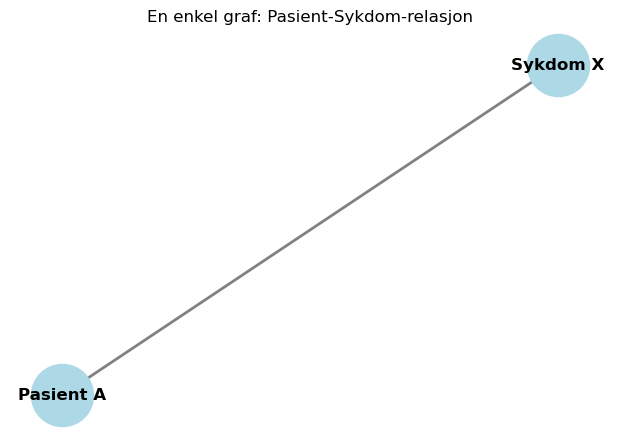

✓ Din første graf er laget!


In [31]:
# Visualiser grafen
plt.figure(figsize=(6, 4))
nx.draw(graf, 
        with_labels=True, 
        node_size=2000, 
        node_color="lightblue", 
        font_size=12, 
        font_weight="bold",
        edge_color="gray",
        width=2)
plt.title("En enkel graf: Pasient-Sykdom-relasjon")
plt.show()

print("✓ Din første graf er laget!")


---

## Graftyper: Rettet vs. urettet (ikke-rettet), vektet vs. uvektet (ikke-vektet)

Grafer kan ha ulike egenskaper:

| Type | Beskrivelse | Eksempel |
|------|-------------|----------|
| **Urettet** | Forbindelser går begge veier | Pasient-likhet |
| **Rettet** | Forbindelser har retning | Sykdom → Symptom |
| **Uvektet** | Forbindelser er binære (finnes/finnes ikke) | Venn eller ikke venn |
| **Vektet** | Forbindelser har styrke/viktighet | Grad av likhet |


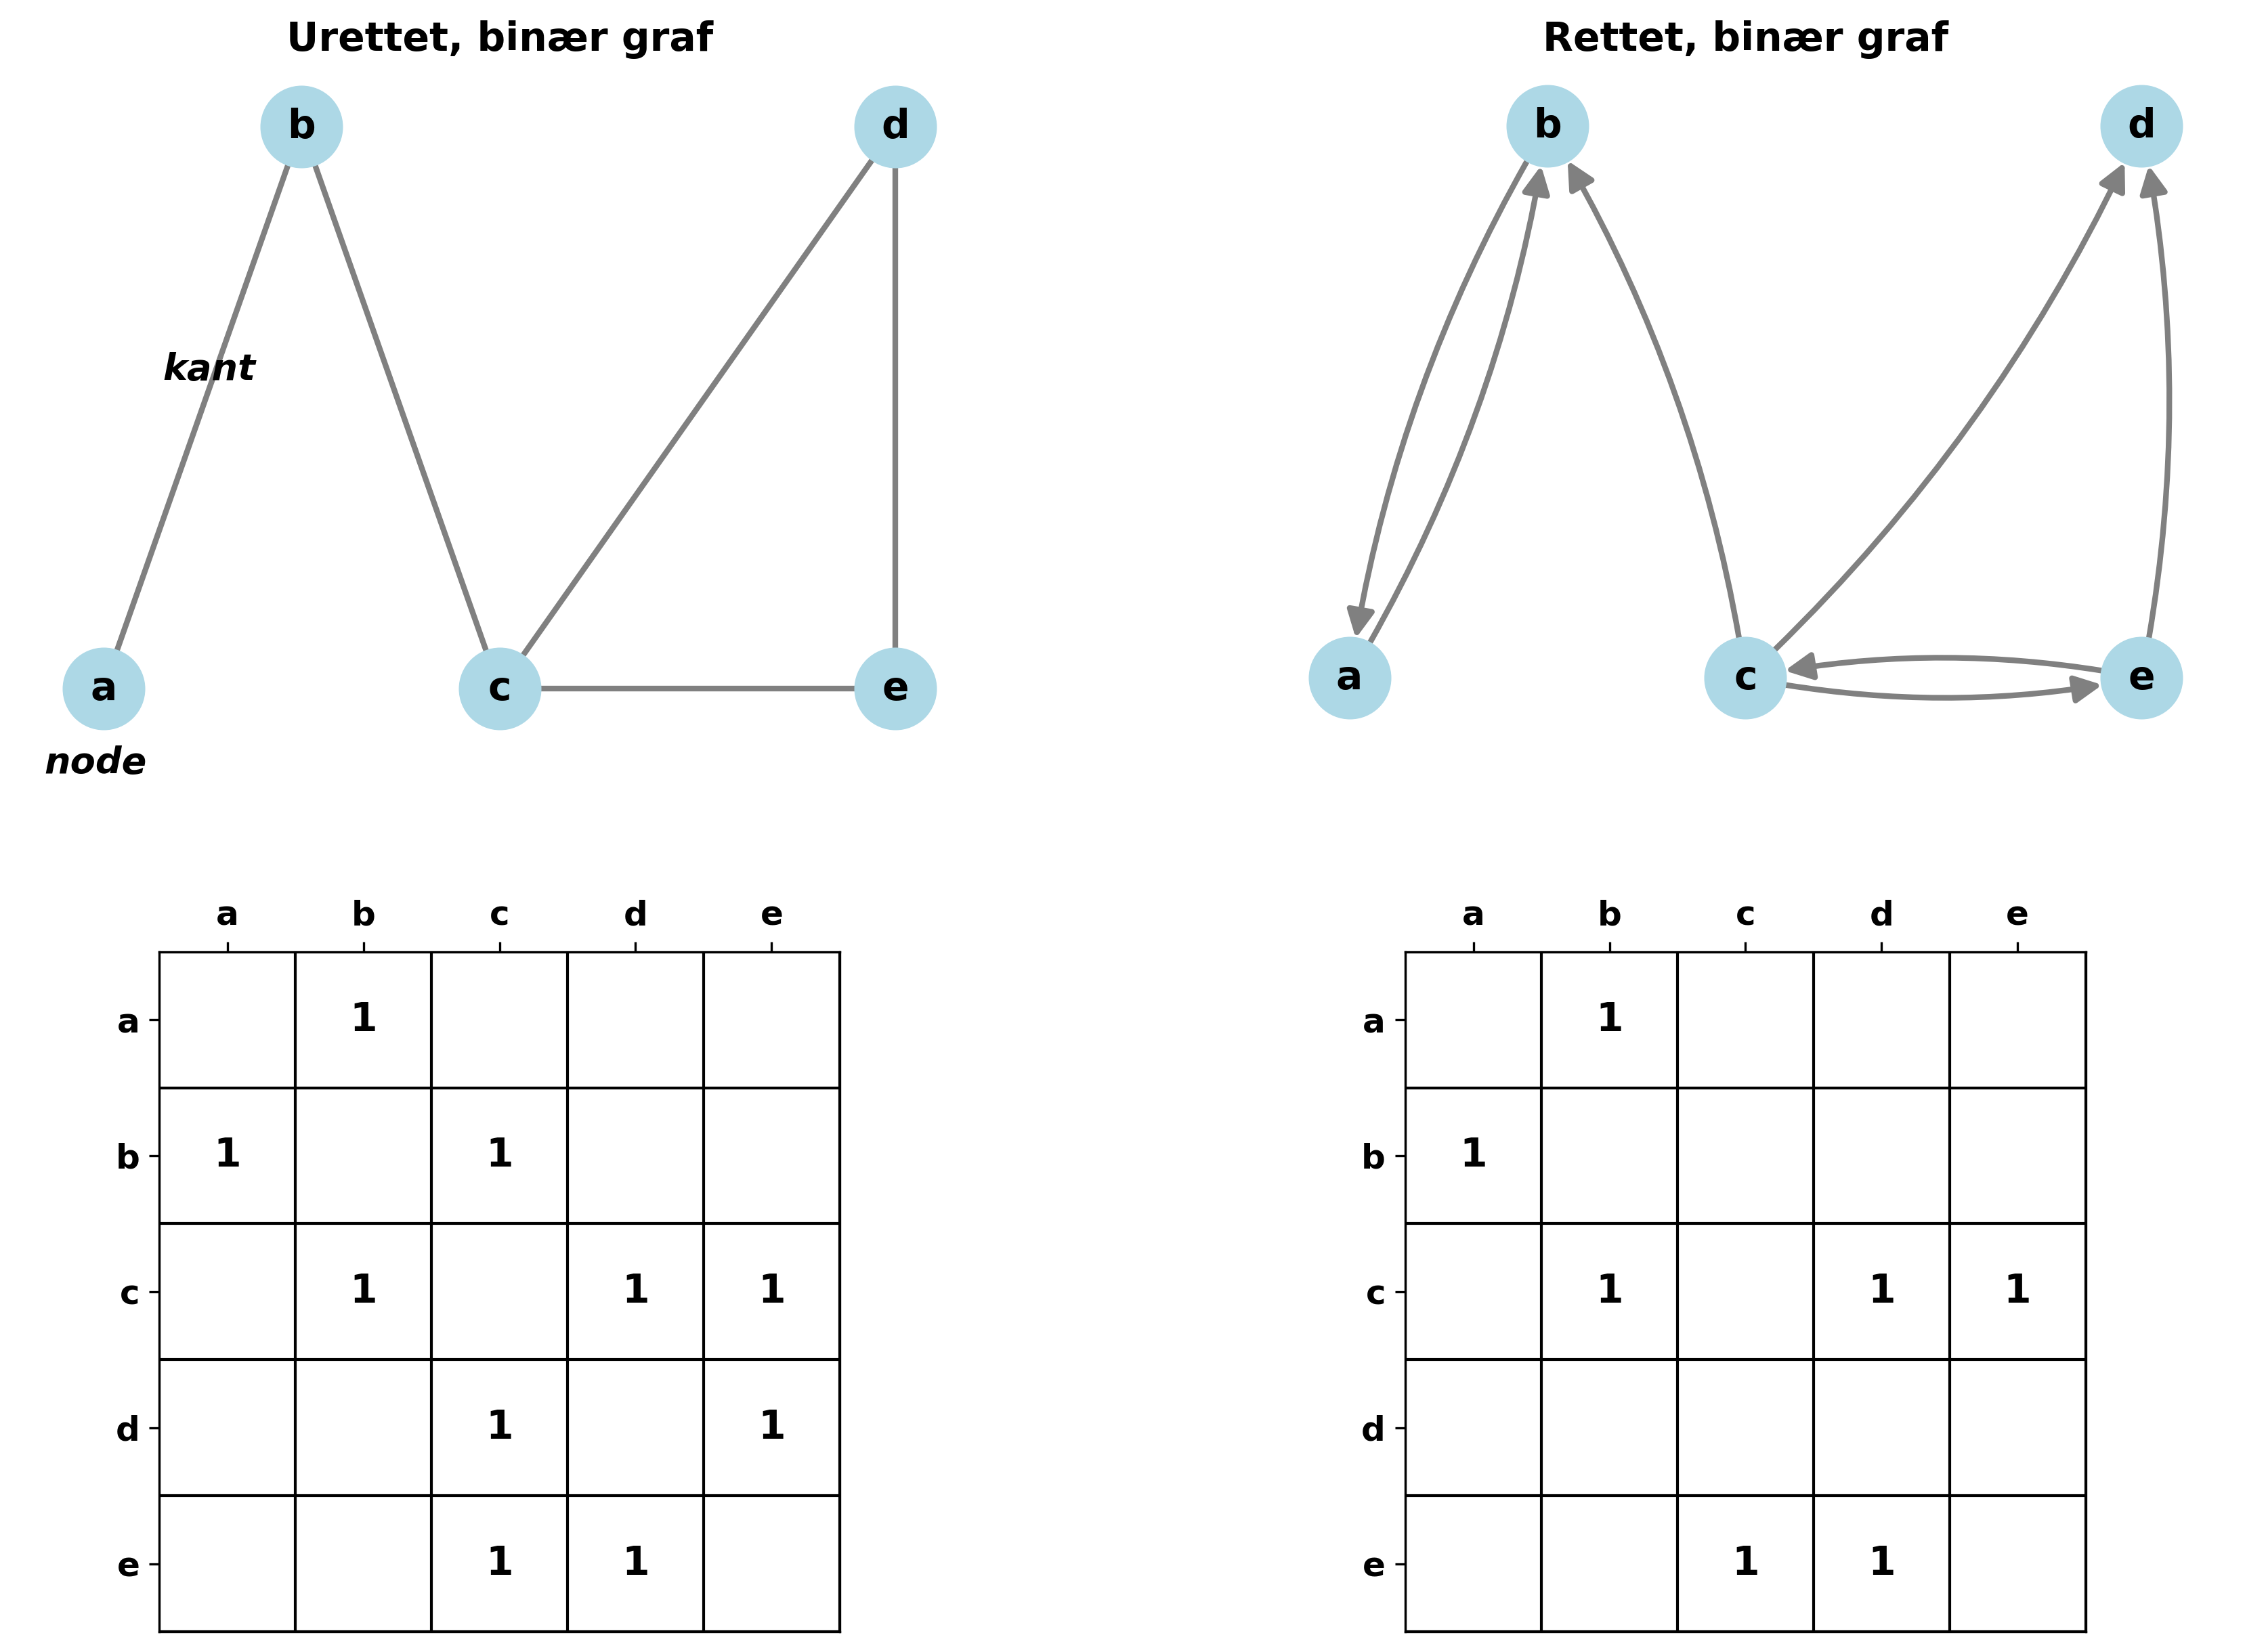

In [19]:
# Last inn eksempelbilde av binære grafer
from IPython.display import display, Image
import os

if is_colab():
    # Hent bilde fra GitHub i Colab
    !mkdir -p figurer
    !wget -q https://raw.githubusercontent.com/arvidl/ELMED219-2026/main/Lab1-NetworkSci-PSN/notebooks/figurer/binary_graphs_no.png -O figurer/binary_graphs_no.png
    display(Image('figurer/binary_graphs_no.png'))
else:
    # Bruk lokal fil (norsk versjon hvis den finnes)
    if os.path.exists('figurer/binary_graphs_no.png'):
        display(Image(filename='figurer/binary_graphs_no.png'))
    else:
        display(Image(filename='../assets/binary_graphs.png'))
        print("💡 Kjør den skjulte koden nedenfor for å generere norsk versjon av figuren.")


**Figur 1: Urettet og rettet graf med tilhørende nabomatriser.** *Øverst vises to grafer med fem noder (a–e). Den venstre grafen er **urettet** (kantene går begge veier), mens den høyre er **rettet** (pilene angir retning). Nederst vises **nabomatrisene** (adjacency matrices) som representerer grafene numerisk.*

---

### Sammenhengen mellom graf og nabomatrise

En **nabomatrise** (adjacency matrix) er en kompakt måte å representere en graf på:

| Egenskap | Forklaring |
|----------|------------|
| **Rader og kolonner** | Hver rad og kolonne representerer en node (a, b, c, d, e) |
| **Verdi = 1** | Det finnes en kant mellom nodene |
| **Verdi = 0 (tom)** | Ingen kant mellom nodene |

**For den urettede grafen:**
- Matrisen er **symmetrisk** rundt diagonalen
- Hvis det finnes en kant a→b, finnes også b→a
- Eksempel: `matrise[a,b] = matrise[b,a] = 1`

**For den rettede grafen:**
- Matrisen er **ikke symmetrisk**
- Kanten går kun i pilens retning
- Eksempel: `matrise[a,b] = 1` men `matrise[b,a]` kan være 0 eller 1 avhengig av om det finnes en pil tilbake

> 💡 **Klinisk relevans:** I pasient-likhetsnettverk bruker vi typisk urettede grafer fordi likhet mellom pasienter er symmetrisk – hvis pasient A ligner på pasient B, ligner også B på A.


<details>
<summary>🔍 <b>Python-kode som genererer figuren</b> (klikk for å utvide)</summary>

```python
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Sett random seed for reproduserbarhet
np.random.seed(42)

# ============================================================================
# FIKSERTE POSISJONER FOR NODENE
# ============================================================================
# Disse posisjonene sikrer at grafene tegnes likt hver gang.
pos = {
    'a': (-1.0, 0.0),   # Venstre, midt
    'b': (-0.5, 1.0),   # Øverst venstre
    'c': (0.0, 0.0),    # Senter
    'd': (1.0, 1.0),    # Øverst høyre
    'e': (1.0, 0.0)     # Høyre, midt
}

# Opprett figur med 2x2 subplots
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], hspace=0.3, wspace=0.3)

# --- Definer grafene ---
# Urettet graf
G_urettet = nx.Graph()
G_urettet.add_edges_from([
    ('a', 'b'), ('b', 'c'), ('c', 'd'), ('c', 'e'), ('d', 'e')
])

# Rettet graf
G_rettet = nx.DiGraph()
G_rettet.add_edges_from([
    ('a', 'b'), ('b', 'a'), ('c', 'b'),
    ('c', 'd'), ('c', 'e'), ('e', 'd'), ('e', 'c')
])

# --- Tegn grafene ---
ax1 = fig.add_subplot(gs[0, 0])
nx.draw(G_urettet, pos, ax=ax1, with_labels=True,
        node_color='lightblue', node_size=800, font_size=14, font_weight='bold',
        edge_color='gray', width=2)
ax1.set_title("Urettet, binær graf", fontsize=14, fontweight='bold')
ax1.text(-1.15, -0.15, "node", fontsize=13, style='italic', fontweight='bold')
ax1.text(-0.85, 0.55, "kant", fontsize=13, style='italic', fontweight='bold')

ax2 = fig.add_subplot(gs[0, 1])
nx.draw(G_rettet, pos, ax=ax2, with_labels=True,
        node_color='lightblue', node_size=800, font_size=14, font_weight='bold',
        edge_color='gray', width=2, arrows=True, arrowsize=20,
        connectionstyle="arc3,rad=0.1")
ax2.set_title("Rettet, binær graf", fontsize=14, fontweight='bold')

# --- Funksjoner for nabomatriser ---
def lag_nabomatrise(G):
    noder = sorted(G.nodes())
    n = len(noder)
    matrise = np.zeros((n, n))
    for i, n1 in enumerate(noder):
        for j, n2 in enumerate(noder):
            if G.has_edge(n1, n2):
                matrise[i, j] = 1
    return matrise, noder

def tegn_nabomatrise(ax, matrise, noder, tittel):
    n = len(noder)
    ax.set_xlim(-0.5, n - 0.5)
    ax.set_ylim(n - 0.5, -0.5)
    
    # Tegn rutenett
    for i in range(n + 1):
        ax.axhline(i - 0.5, color='black', linewidth=1)
        ax.axvline(i - 0.5, color='black', linewidth=1)
    
    # Legg til verdier
    for i in range(n):
        for j in range(n):
            if matrise[i, j] == 1:
                ax.text(j, i, '1', ha='center', va='center', fontsize=14, fontweight='bold')
    
    # Aksetikker
    ax.set_xticks(range(n))
    ax.set_yticks(range(n))
    ax.set_xticklabels(noder, fontsize=12, fontweight='bold')
    ax.set_yticklabels(noder, fontsize=12, fontweight='bold')
    ax.xaxis.tick_top()
    ax.set_aspect('equal')
    ax.set_title(tittel, fontsize=12, pad=30)

# --- Tegn nabomatriser ---
ax3 = fig.add_subplot(gs[1, 0])
matrise_u, noder = lag_nabomatrise(G_urettet)
tegn_nabomatrise(ax3, matrise_u, noder, "")

ax4 = fig.add_subplot(gs[1, 1])
matrise_r, noder = lag_nabomatrise(G_rettet)
tegn_nabomatrise(ax4, matrise_r, noder, "")

plt.tight_layout()
plt.savefig('figurer/binary_graphs_no.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()
```

</details>


### La oss lage begge typer grafer i Python


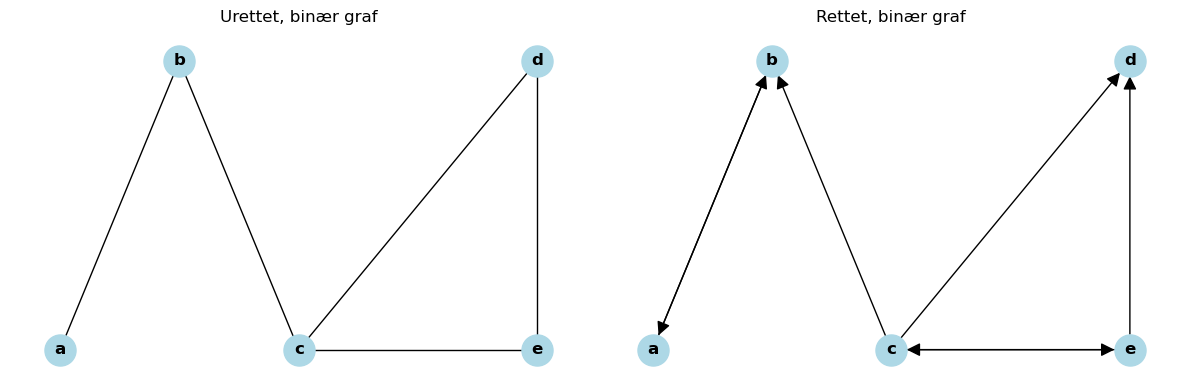

✓ Begge graftyper er visualisert!


In [20]:
# ============================================================================
# SAMMENLIGNING: URETTET VS. RETTET GRAF
# ============================================================================

import networkx as nx
import matplotlib.pyplot as plt

# Opprett figur med to subplots side om side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# --- Urettet graf ---
G_urettet = nx.Graph()
G_urettet.add_edges_from([
    ('a', 'b'),
    ('b', 'c'),
    ('c', 'd'),
    ('c', 'e'),
    ('d', 'e')
])

# --- Rettet graf ---
G_rettet = nx.DiGraph()
G_rettet.add_edges_from([
    ('a', 'b'),
    ('b', 'a'),
    ('c', 'b'),
    ('c', 'd'),
    ('c', 'e'),
    ('e', 'd'),
    ('e', 'c')
])

# Posisjoner for nodene (samme for begge grafer)
pos = {
    'a': (-1, 0),
    'b': (-0.5, 1),
    'c': (0, 0),
    'd': (1, 1),
    'e': (1, 0)
}

# Tegn urettet graf
nx.draw(G_urettet, pos, ax=ax1, 
        with_labels=True,
        node_color='lightblue',
        node_size=500,
        font_size=12,
        font_weight='bold')
ax1.set_title("Urettet, binær graf")

# Tegn rettet graf
nx.draw(G_rettet, pos, ax=ax2,
        with_labels=True,
        node_color='lightblue',
        node_size=500,
        font_size=12,
        font_weight='bold',
        arrows=True,
        arrowsize=20)
ax2.set_title("Rettet, binær graf")

plt.tight_layout()
plt.show()

print("✓ Begge graftyper er visualisert!")


---

## Nabomatrisen (adjacency matrix)

En **nabomatrise** er en måte å representere en graf som en tabell:
- Radene og kolonnene representerer nodene
- Verdien i celle (i,j) angir om det finnes en kant mellom node i og node j

Dette er viktig fordi mange algoritmer bruker matrisberegninger!


In [21]:
# ============================================================================
# NABOMATRISER SOM TEKST
# ============================================================================

def print_nabomatrise(G, tittel):
    """Skriv ut nabomatrisen for en graf."""
    noder = sorted(G.nodes())
    print(f"\n{tittel}:")
    print("  " + " ".join(noder))
    for i in noder:
        rad = [str(1) if G.has_edge(i, j) else " " for j in noder]
        print(f"{i} {' '.join(rad)}")

print_nabomatrise(G_urettet, "Urettet nabomatrise")
print_nabomatrise(G_rettet, "Rettet nabomatrise")



Urettet nabomatrise:
  a b c d e
a   1      
b 1   1    
c   1   1 1
d     1   1
e     1 1  

Rettet nabomatrise:
  a b c d e
a   1      
b 1        
c   1   1 1
d          
e     1 1  


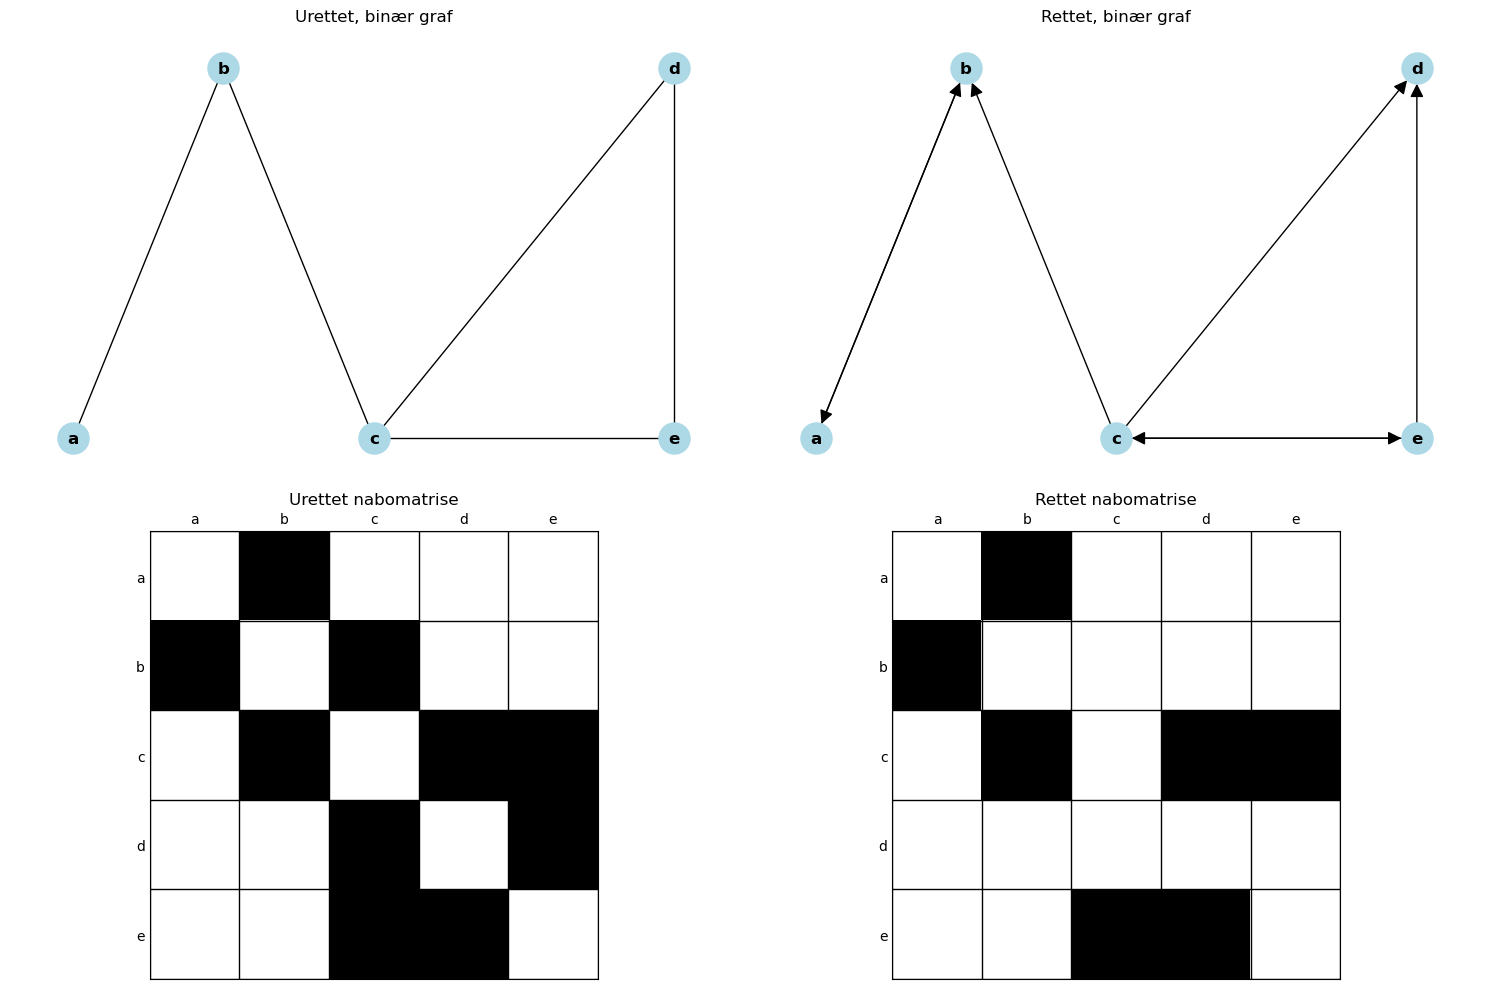

✓ Grafene og nabomatrisene er visualisert!


In [22]:
# ============================================================================
# NABOMATRISER SOM GRAFIKK
# ============================================================================

import numpy as np

# Opprett figur med 2x2 subplots
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

def lag_nabomatrise(G):
    """Konverter graf til numpy nabomatrise."""
    noder = sorted(G.nodes())
    n = len(noder)
    matrise = np.zeros((n, n))
    for i, node1 in enumerate(noder):
        for j, node2 in enumerate(noder):
            if G.has_edge(node1, node2):
                matrise[i, j] = 1
    return matrise, noder

def tegn_nabomatrise(ax, matrise, noder, tittel):
    """Tegn nabomatrise som rutenett."""
    n = len(noder)
    ax.matshow(matrise, cmap='binary')
    
    # Legg til rutenett
    for i in range(n+1):
        ax.axhline(i-0.5, color='black', linewidth=1)
        ax.axvline(i-0.5, color='black', linewidth=1)
    
    # Legg til verdier
    for i in range(n):
        for j in range(n):
            if matrise[i, j] == 1:
                ax.text(j, i, '1', ha='center', va='center', fontsize=12)
    
    # Legg til nodenavn
    ax.set_xticks(range(n))
    ax.set_yticks(range(n))
    ax.set_xticklabels(noder)
    ax.set_yticklabels(noder)
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_title(tittel)

# Tegn urettet graf
ax1 = fig.add_subplot(gs[0, 0])
nx.draw(G_urettet, pos, ax=ax1,
        with_labels=True,
        node_color='lightblue',
        node_size=500,
        font_size=12,
        font_weight='bold')
ax1.set_title("Urettet, binær graf")

# Tegn rettet graf
ax2 = fig.add_subplot(gs[0, 1])
nx.draw(G_rettet, pos, ax=ax2,
        with_labels=True,
        node_color='lightblue',
        node_size=500,
        font_size=12,
        font_weight='bold',
        arrows=True,
        arrowsize=20)
ax2.set_title("Rettet, binær graf")

# Tegn urettet nabomatrise
ax3 = fig.add_subplot(gs[1, 0])
matrise_urettet, noder = lag_nabomatrise(G_urettet)
tegn_nabomatrise(ax3, matrise_urettet, noder, "Urettet nabomatrise")

# Tegn rettet nabomatrise
ax4 = fig.add_subplot(gs[1, 1])
matrise_rettet, noder = lag_nabomatrise(G_rettet)
tegn_nabomatrise(ax4, matrise_rettet, noder, "Rettet nabomatrise")

plt.tight_layout()
plt.show()

print("✓ Grafene og nabomatrisene er visualisert!")


---

## Interaktiv presentasjon: Grafteori i medisin

Nedenfor finner du en interaktiv lysbildepresentasjon som dekker:

1. **Grunnleggende grafteori** - Noder, kanter og grafegenskaper
2. **Biologiske nettverk** - Protein-interaksjoner, gennettverk
3. **Kliniske nettverk** - Sykdom-symptom-relasjoner
4. **Pasient-likhetsnettverk** - Gruppering av lignende pasienter
5. **Nettverksanalyse** - Sentralitetsmål og klynger
6. **AI og nettverk** - Maskinlæring på grafdata

> 💡 **Tips:** Bruk pilene for å navigere mellom lysbildene.



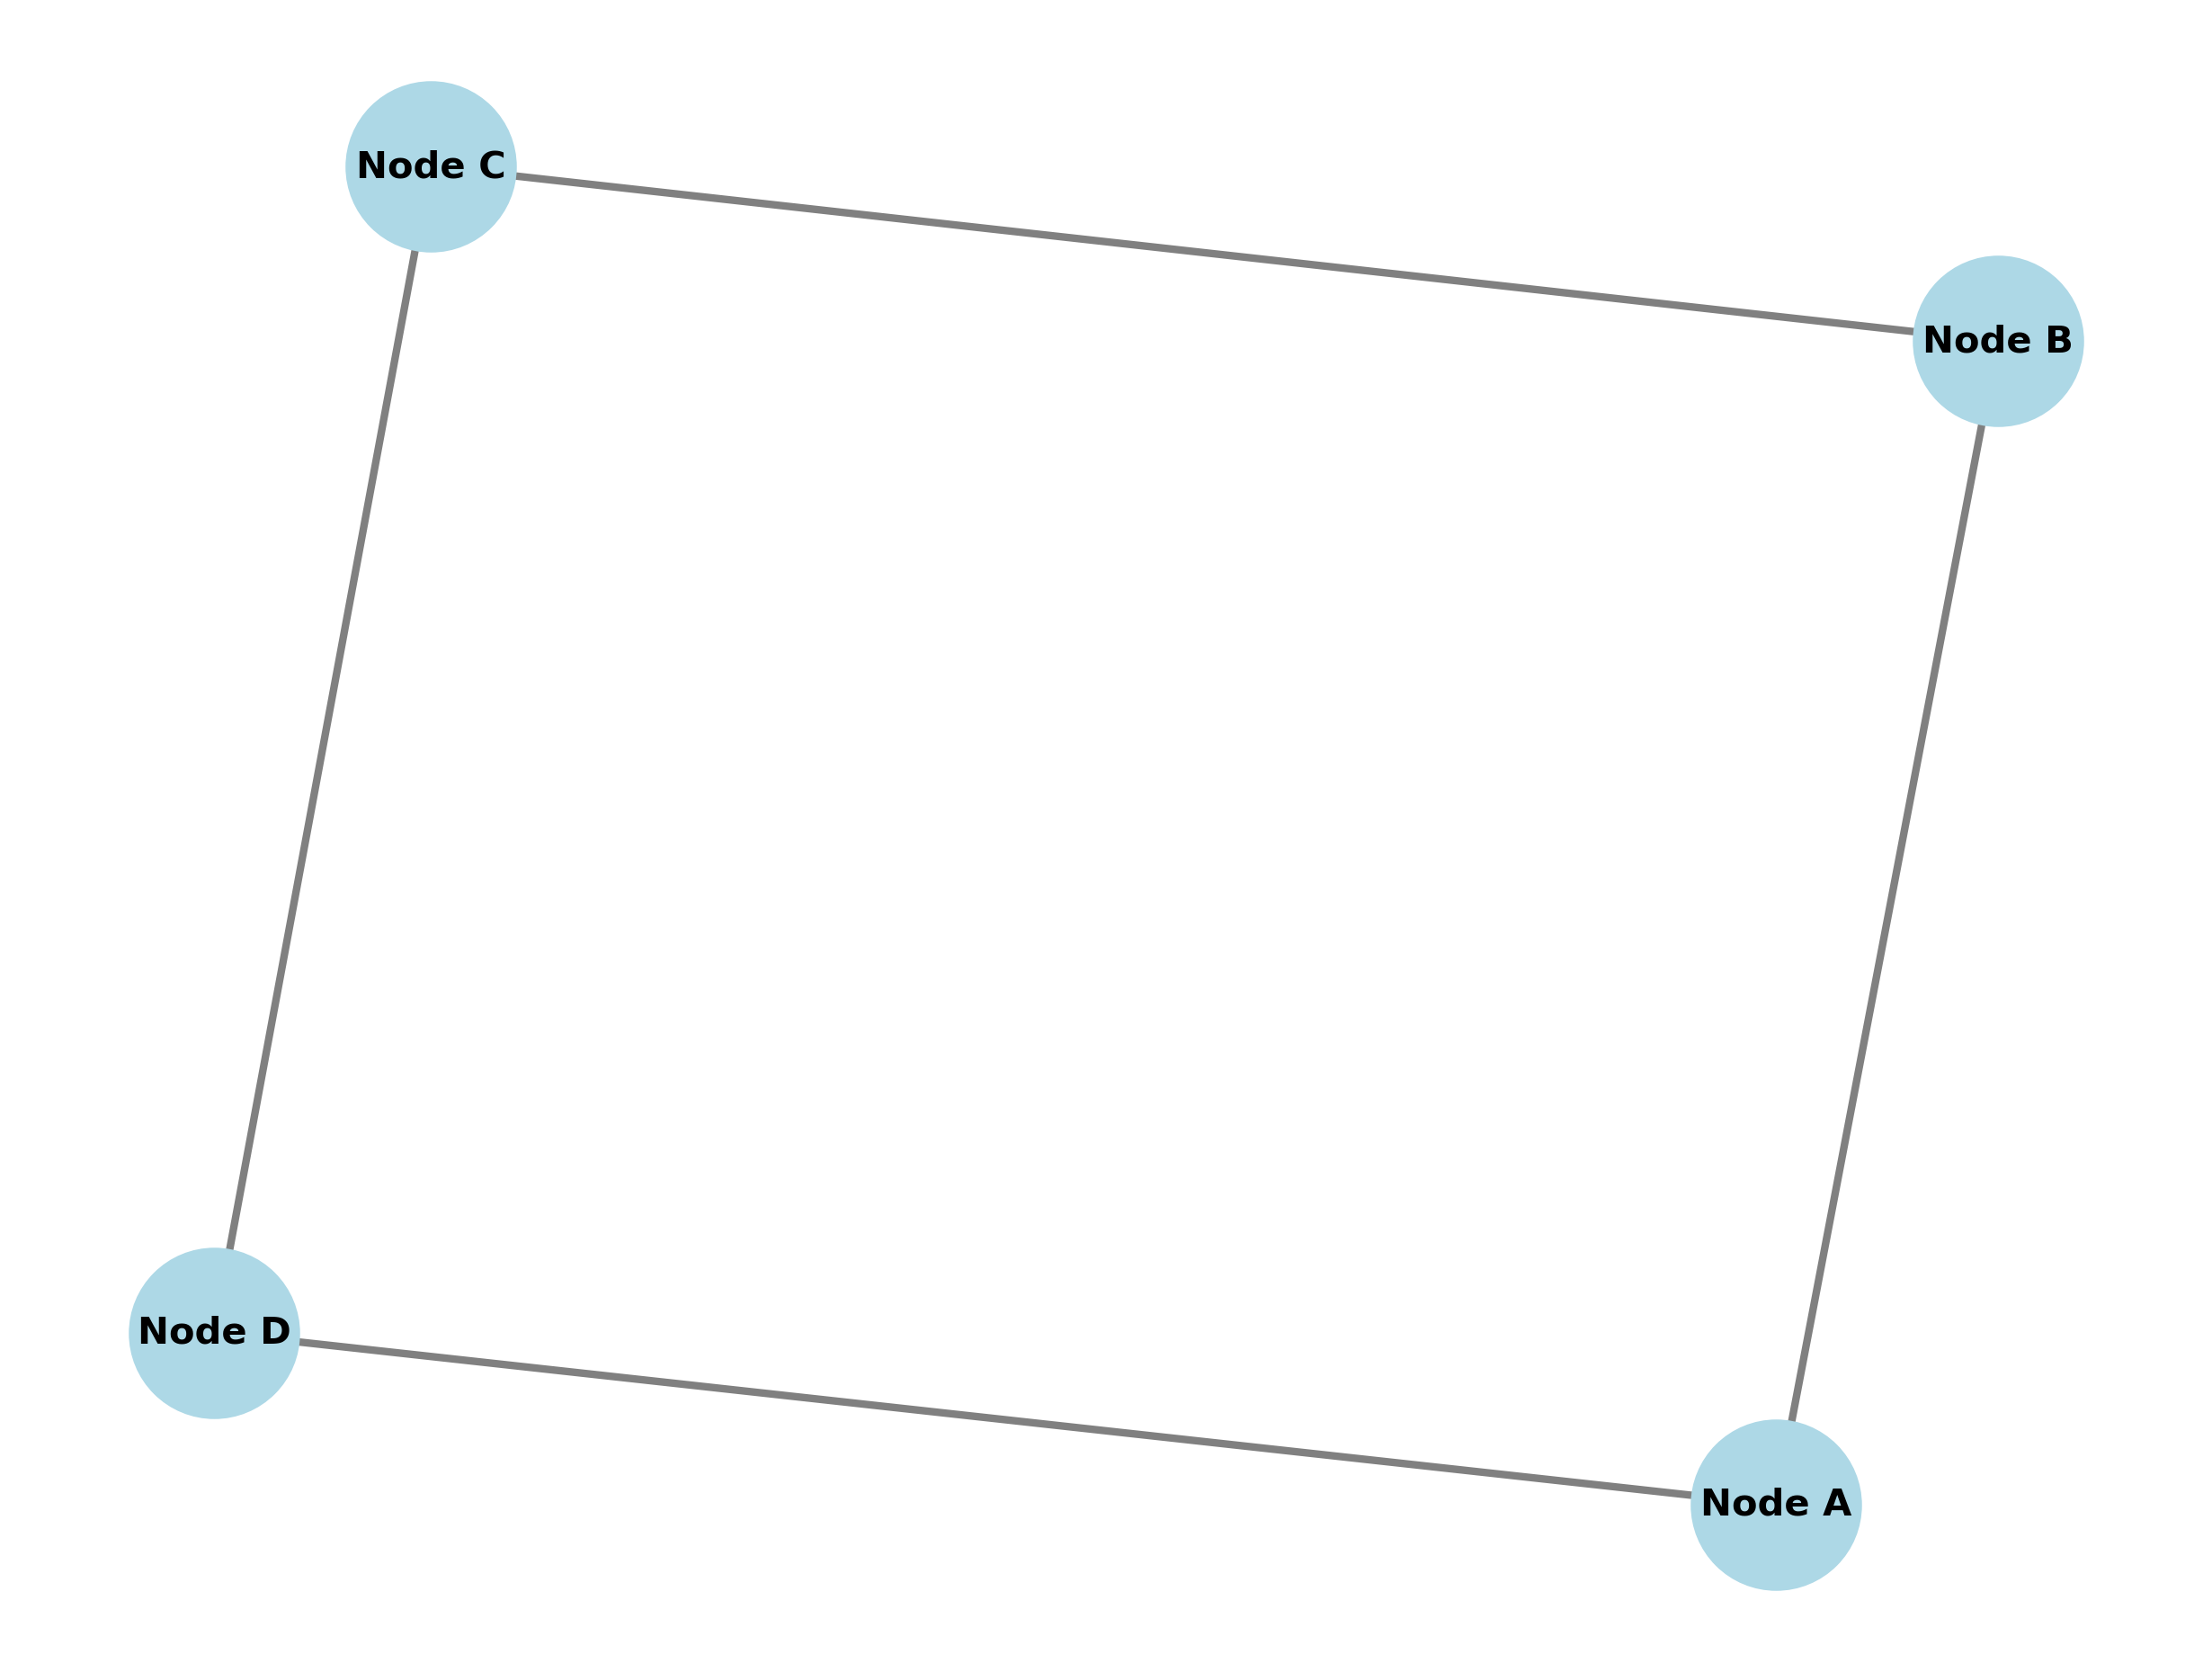

### Grunnleggende byggesteiner

                * En graf er en matematisk struktur som viser relasjoner

                * **Noder** (vertices): Objektene vi studerer
                    - Eksempler: Pasienter, sykdommer, symptomer

                * **Kanter** (edges): Forbindelser mellom noder
                    - Eksempler: Lignende symptomer, sykdomsrelasjoner

In [23]:
# ============================================================================
# INTERAKTIV LYSBILDEPRESENTASJON
# ============================================================================

from IPython.display import display, Markdown, HTML, clear_output
import ipywidgets as widgets
import networkx as nx
import matplotlib.pyplot as plt
import io
import base64
import numpy as np

class Lysbildevisning:
    """En interaktiv lysbildevisning om grafteori i medisin."""
    
    def __init__(self):
        self.gjeldende_lysbilde = 0
        self.lysbilder = self.forbered_lysbilder()
        
        # Opprett navigasjonsknapper
        self.forrige_knapp = widgets.Button(
            description='← Forrige',
            layout=widgets.Layout(width='100px'))
        self.neste_knapp = widgets.Button(
            description='Neste →',
            layout=widgets.Layout(width='100px'))
        self.lysbilde_nummer = widgets.HTML(value=self._hent_lysbilde_nummer())
        
        self.forrige_knapp.on_click(self.forrige_lysbilde)
        self.neste_knapp.on_click(self.neste_lysbilde)
        
        self.kontroller = widgets.HBox([
            self.forrige_knapp, 
            self.lysbilde_nummer, 
            self.neste_knapp
        ], layout=widgets.Layout(
            display='flex',
            flex_flow='row',
            align_items='center',
            justify_content='center',
            margin='20px 0px'
        ))
        
        # CSS for bedre formatering
        display(HTML("""
        <style>
            li { margin-bottom: 1.5em !important; line-height: 1.6 !important; }
            ul { margin-top: 1.5em !important; margin-bottom: 1.5em !important; }
            h1 { margin-bottom: 1em !important; }
            h3 { margin-bottom: 1.5em !important; }
        </style>
        """))
        
        display(self.kontroller)
        self.vis_gjeldende_lysbilde()

    def generer_eksempelgrafer(self):
        """Generer eksempelgrafer for lysbildene."""
        grafer = []
        
        # 1. Enkel graf
        G1 = nx.Graph()
        G1.add_edges_from([('Node A', 'Node B'), ('Node B', 'Node C'), 
                          ('Node C', 'Node D'), ('Node D', 'Node A')])
        
        # 2. Grafegenskaper
        G2 = nx.DiGraph()
        G2.add_weighted_edges_from([('Sykdom', 'Symptom 1', 0.8), 
                                    ('Sykdom', 'Symptom 2', 0.6)])
        
        # 3. Biologisk nettverk
        G3 = nx.Graph()
        proteiner = ['Protein A', 'Protein B', 'Protein C', 'Protein D']
        G3.add_nodes_from(proteiner)
        G3.add_edges_from([('Protein A', 'Protein B'), ('Protein B', 'Protein C'),
                          ('Protein C', 'Protein D'), ('Protein D', 'Protein A')])
        
        # 4. Klinisk nettverk
        G4 = nx.Graph()
        G4.add_edges_from([('Feber', 'Influensa'), ('Hoste', 'Influensa'), 
                          ('Feber', 'COVID'), ('Hoste', 'COVID')])
        
        # 5. Pasient-likhet
        G5 = nx.Graph()
        for i in range(6):
            G5.add_node(f'Pasient {i+1}')
        G5.add_edges_from([('Pasient 1', 'Pasient 2'), ('Pasient 2', 'Pasient 3'),
                          ('Pasient 3', 'Pasient 4'), ('Pasient 4', 'Pasient 5')])
        
        # 6-20: Diverse nettverkstyper
        G6 = nx.karate_club_graph()  # Nettverksmetrikker
        G7 = nx.star_graph(8)  # Sentralitet
        G8 = nx.random_geometric_graph(20, 0.2)  # Klynger
        G9 = nx.grid_2d_graph(4, 4)  # Stianalyse
        G10 = nx.random_geometric_graph(15, 0.3)  # Visualisering
        
        G11 = nx.Graph()  # Sykdomsnettverk
        G11.add_nodes_from(['Diabetes', 'Hjertesykdom', 'Hypertensjon', 'Fedme'])
        G11.add_edges_from([('Diabetes', 'Hjertesykdom'), 
                           ('Hypertensjon', 'Hjertesykdom'),
                           ('Fedme', 'Diabetes')])
        
        G12 = nx.DiGraph()  # Legemiddelinteraksjoner
        G12.add_nodes_from(['Medisin A', 'Medisin B', 'Medisin C'])
        G12.add_edges_from([('Medisin A', 'Medisin B'), ('Medisin B', 'Medisin C')])
        
        G13 = nx.watts_strogatz_graph(10, 3, 0.3)  # Gennettverk
        G14 = nx.barabasi_albert_graph(10, 2)  # Proteinnettverk
        
        G15 = nx.Graph()  # Kliniske studier
        G15.add_nodes_from(['Studie 1', 'Studie 2', 'Studie 3', 'Utfall A', 'Utfall B'])
        G15.add_edges_from([('Studie 1', 'Utfall A'), ('Studie 2', 'Utfall B')])
        
        G16 = nx.balanced_tree(2, 3)  # AI-integrasjon
        
        G17 = nx.Graph()  # Persontilpasset medisin
        G17.add_nodes_from(['Genomikk', 'Kliniske data', 'Behandling'])
        G17.add_edges_from([('Genomikk', 'Behandling'), ('Kliniske data', 'Behandling')])
        
        G18 = nx.random_geometric_graph(10, 0.4)  # Kasusstudier
        
        G19 = nx.Graph()  # Fremtidsperspektiver
        G19.add_nodes_from(['AI', 'Stordata', 'Persontilpasset medisin'])
        G19.add_edges_from([('AI', 'Stordata'), ('Stordata', 'Persontilpasset medisin')])
        
        G20 = nx.Graph()  # Oppsummering
        G20.add_nodes_from(['Grafteori', 'Medisin', 'Fremtiden'])
        G20.add_edges_from([('Grafteori', 'Medisin'), ('Medisin', 'Fremtiden')])
        
        # Generer bilder for alle grafer
        for G in [G1, G2, G3, G4, G5, G6, G7, G8, G9, G10, 
                 G11, G12, G13, G14, G15, G16, G17, G18, G19, G20]:
            plt.figure(figsize=(8,6))
            nx.draw(G, with_labels=True, node_color='lightblue', 
                   node_size=2000, font_size=10, font_weight='bold',
                   width=2, edge_color='gray')
            
            buf = io.BytesIO()
            plt.savefig(buf, format='png', bbox_inches='tight', dpi=300)
            buf.seek(0)
            img_str = base64.b64encode(buf.getvalue()).decode()
            plt.close()
            
            grafer.append(f'data:image/png;base64,{img_str}')
            
        return grafer

    def forbered_lysbilder(self):
        """Forbered alle lysbilder med innhold."""
        grafer = self.generer_eksempelgrafer()
        return [
            {
                "tittel": "Hva er en graf?",
                "innhold": """### Grunnleggende byggesteiner

                * En graf er en matematisk struktur som viser relasjoner

                * **Noder** (vertices): Objektene vi studerer
                    - Eksempler: Pasienter, sykdommer, symptomer

                * **Kanter** (edges): Forbindelser mellom noder
                    - Eksempler: Lignende symptomer, sykdomsrelasjoner""",
                "bilde": grafer[0]
            },
            {
                "tittel": "Grafegenskaper",
                "innhold": """### Forstå grafkarakteristikker

                * **Rettet vs. urettet**
                    - Rettet: Enveisrelasjoner (Sykdom → Symptom)
                    - Urettet: Toveisrelasjoner (Pasientlikhet)

                * **Vektet vs. uvektet**
                    - Vektet: Forbindelser har styrke/viktighet
                    - Uvektet: Forbindelser er binære (finnes/finnes ikke)""",
                "bilde": grafer[1]
            },
            {
                "tittel": "Biologiske nettverk",
                "innhold": """### Nettverk i levende systemer

                * Representerer biologiske relasjoner
                    - Protein-protein-interaksjoner
                    - Genreguleringsnettverk
                    - Metabolske signalveier

                * Hjelper oss å forstå komplekse biologiske systemer
                    - Sykdomsmekanismer
                    - Legemiddelmål
                    - Behandlingsrespons""",
                "bilde": grafer[2]
            },
            {
                "tittel": "Kliniske nettverk",
                "innhold": """### Nettverk i helsevesenet

                * **Sykdom-symptom-nettverk**
                    - Kobler sykdommer til deres symptomer
                    - Viser komorbiditetsmønstre

                * **Behandling-respons-nettverk**
                    - Kobler behandlinger til utfall
                    - Viser legemiddelinteraksjoner""",
                "bilde": grafer[3]
            },
            {
                "tittel": "Pasient-likhetsnettverk",
                "innhold": """### Forstå pasientrelasjoner

                * Pasienter representeres som noder

                * Forbindelser viser likheter mellom pasienter
                    - Lignende symptomer
                    - Lignende diagnoser
                    - Lignende behandlingsrespons

                * Hjelper med å identifisere pasientundergrupper for persontilpasset behandling""",
                "bilde": grafer[4]
            },
            {
                "tittel": "Nettverksmetrikker",
                "innhold": """### Måle nettverksegenskaper

                * **Grad**: Antall forbindelser per node

                * **Tetthet**: Nettverkets totale tilkoblingsgrad

                * **Modularitet**: Styrke på samfunnsstruktur

                * **Stilengde**: Avstand mellom noder""",
                "bilde": grafer[5]
            },
            {
                "tittel": "Sentralitetsmål",
                "innhold": """### Identifisere viktige noder

                * **Gradsentralitet**: Antall direkte forbindelser

                * **Mellomleddsentralitet**: Bronoder mellom grupper

                * **Nærhetssentralitet**: Gjennomsnittlig avstand til alle andre noder

                * **Egenvektorsentralitet**: Tilkobling til viktige noder""",
                "bilde": grafer[6]
            },
            {
                "tittel": "Nettverksklynger",
                "innhold": """### Finne pasientgrupper

                * **Samfunnsdeteksjon**
                    - Identifisere lignende pasientgrupper
                    - Finne sykdomsundertyper

                * **Klyngekoeffisienter**
                    - Måle gruppesammenheng
                    - Finne tett sammenkoblede grupper""",
                "bilde": grafer[7]
            },
            {
                "tittel": "Stianalyse",
                "innhold": """### Forstå forbindelser

                * **Korteste stier**
                    - Sykdomsprogresjon
                    - Behandlingsveier

                * **Nettverksavstand**
                    - Pasientlikhetsmål
                    - Sykdomsrelasjoner""",
                "bilde": grafer[8]
            },
            {
                "tittel": "Nettverksvisualisering",
                "innhold": """### Visuell analyse

                * **Layout-algoritmer**
                    - Kraftrettet
                    - Sirkulær
                    - Hierarkisk

                * **Visuelle egenskaper**
                    - Nodestørrelse/-farge
                    - Kanttykkelse/-type
                    - Merkelapper og annotasjoner""",
                "bilde": grafer[9]
            },
            {
                "tittel": "Sykdomsnettverk",
                "innhold": """### Sykdomsrelasjoner

                * **Komorbiditetsnettverk**
                    - Samtidig forekomst av sykdommer
                    - Risikofaktorer

                * **Symptomnettverk**
                    - Symptomrelasjoner
                    - Diagnostiske mønstre""",
                "bilde": grafer[10]
            },
            {
                "tittel": "Legemiddelinteraksjoner",
                "innhold": """### Medisinnettverk

                * **Legemiddelinteraksjoner**
                    - Gunstige kombinasjoner
                    - Skadelige interaksjoner

                * **Bivirkningsnettverk**
                    - Vanlige mønstre
                    - Risikoprediksjon""",
                "bilde": grafer[11]
            },
            {
                "tittel": "Gennettverk",
                "innhold": """### Genetiske interaksjoner

                * **Genekspresjonsnettverk**
                    - Ko-ekspresjonsmønstre
                    - Regulatoriske relasjoner

                * **Sykdomsgenetikk**
                    - Genetiske risikofaktorer
                    - Signalveisanalyse""",
                "bilde": grafer[12]
            },
            {
                "tittel": "Proteinnettverk",
                "innhold": """### Proteininteraksjoner

                * **Protein-protein-interaksjonsnettverk**
                    - Fysiske interaksjoner
                    - Funksjonelle relasjoner

                * **Sykdomsmekanismer**
                    - Molekylære signalveier
                    - Legemiddelmål""",
                "bilde": grafer[13]
            },
            {
                "tittel": "Nettverk i kliniske studier",
                "innhold": """### Studieanalyse

                * **Studieutfall**
                    - Behandlingseffektivitet
                    - Bivirkningmønstre

                * **Pasientundergrupper**
                    - Responsmønstre
                    - Risikofaktorer""",
                "bilde": grafer[14]
            },
            {
                "tittel": "AI-integrasjon",
                "innhold": """### Maskinlæring og nettverk

                * **Nettverksbasert maskinlæring**
                    - Mønstergjenkjenning
                    - Prediksjonsmodeller

                * **Graf-nevrale nettverk**
                    - Pasientklassifisering
                    - Utfallsprediksjon""",
                "bilde": grafer[15]
            },
            {
                "tittel": "Persontilpasset medisin",
                "innhold": """### Individualisert helsehjelp

                * **Pasientprofilering**
                    - Individuelle karakteristikker
                    - Behandlingsresponsprediksjon

                * **Behandlingsvalg**
                    - Persontilpassede anbefalinger
                    - Risikovurdering""",
                "bilde": grafer[16]
            },
            {
                "tittel": "Kasusstudier",
                "innhold": """### Virkelige anvendelser

                * **Sykdomsundertyping**
                    - Kreftundertyper
                    - Behandlingsresponsgrupper

                * **Behandlingsplanlegging**
                    - Terapivalg
                    - Risikohåndtering""",
                "bilde": grafer[17]
            },
            {
                "tittel": "Fremtidsperspektiver",
                "innhold": """### Nye trender

                * **Sanntidsanalyse**
                    - Dynamiske nettverk
                    - Tidsmønstre

                * **Integrasjon med andre teknologier**
                    - Wearables
                    - Elektroniske pasientjournaler""",
                "bilde": grafer[18]
            },
            {
                "tittel": "Oppsummering",
                "innhold": """### Hovedpunkter

                * Nettverk gir kraftige verktøy for medisinsk analyse

                * Pasient-likhet muliggjør persontilpasset medisin

                * Integrasjon med AI forbedrer helsetjenester

                * Fremtiden bringer muligheter for presisjonsmedisin""",
                "bilde": grafer[19]
            }
        ]
    
    def _hent_lysbilde_nummer(self):
        return f'<h4 style="margin: 0 20px;">Lysbilde {self.gjeldende_lysbilde + 1}/{len(self.lysbilder)}</h4>'
    
    def vis_gjeldende_lysbilde(self):
        clear_output(wait=True)
        display(self.kontroller)
        
        lysbilde = self.lysbilder[self.gjeldende_lysbilde]
        
        display(HTML(f"""
        <div style="text-align: center;">
            <h1>{lysbilde['tittel']}</h1>
            <img src="{lysbilde['bilde']}" style="width: 600px; margin: 20px auto;">
        </div>
        """))
        display(Markdown(lysbilde['innhold']))
    
    def neste_lysbilde(self, _):
        if self.gjeldende_lysbilde < len(self.lysbilder) - 1:
            self.gjeldende_lysbilde += 1
            self.lysbilde_nummer.value = self._hent_lysbilde_nummer()
            self.vis_gjeldende_lysbilde()
    
    def forrige_lysbilde(self, _):
        if self.gjeldende_lysbilde > 0:
            self.gjeldende_lysbilde -= 1
            self.lysbilde_nummer.value = self._hent_lysbilde_nummer()
            self.vis_gjeldende_lysbilde()

# Opprett og vis lysbildevisningen
print("Laster inn interaktiv presentasjon...")
presentasjon = Lysbildevisning()


---

## Din tur!

Nå som du har sett grunnleggende konsepter, prøv deg frem:

1. **Lag din egen graf** med pasienter og sykdommer
2. **Eksperimenter** med ulike graftyper (rettet, vektet)
3. **Visualiser** grafene på forskjellige måter

> 💡 **Tips:** Se på de andre notebooks i denne lab-mappen for mer avanserte eksempler!


In [24]:
# ============================================================================
# DIN TUR: EKSPERIMENTER HER!
# ============================================================================

# Lag din egen graf
min_graf = nx.Graph()

# Legg til noder og kanter her:
# min_graf.add_node("...")
# min_graf.add_edge("...", "...")

# Visualiser:
# plt.figure(figsize=(8, 6))
# nx.draw(min_graf, with_labels=True, node_color='lightgreen')
# plt.show()


---

## Neste steg

Fortsett med de andre notebooks i Lab 1:

| Notebook | Beskrivelse |
|----------|-------------|
| `01-networkx-tutorial.ipynb` | Detaljert NetworkX-opplæring |
| `02-patient-similarity-networks-iris.ipynb` | PSN med Iris-datasettet |
| `03-patient-similarity-networks-ibs-brain.ipynb` | PSN med ekte pasientdata |

Lykke til! 🚀
